#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [305]:
#Importaciones:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
#Solucion taller:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
n_train = train.shape[0]

train_y = train["SalePrice"].copy()
concat = pd.concat([train.drop(columns=["SalePrice"]), test], sort=False).reset_index(drop=True)

na_as_none = [
    'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
    'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2','MasVnrType'
]
for c in na_as_none:
    if c in concat.columns:
        concat[c] = concat[c].fillna("None")

zero_if_na = [
    'GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea','LotFrontage'
]
for c in zero_if_na:
    if c in concat.columns:
        concat[c] = concat[c].fillna(0)

for col in concat.select_dtypes(include=['object']).columns:
    concat[col] = concat[col].fillna("None")

concat = pd.get_dummies(concat, drop_first=True)

train_proc = concat.iloc[:n_train, :].copy()
test_proc = concat.iloc[n_train:, :].copy()

num_cols = train_proc.select_dtypes(include=[np.number]).columns.tolist()
if "Id" in num_cols:
    num_cols.remove("Id")

scaler = StandardScaler()
train_proc[num_cols] = scaler.fit_transform(train_proc[num_cols])
test_proc[num_cols] = scaler.transform(test_proc[num_cols])

X = train_proc.copy()
y = np.log1p(train_y.values)

selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

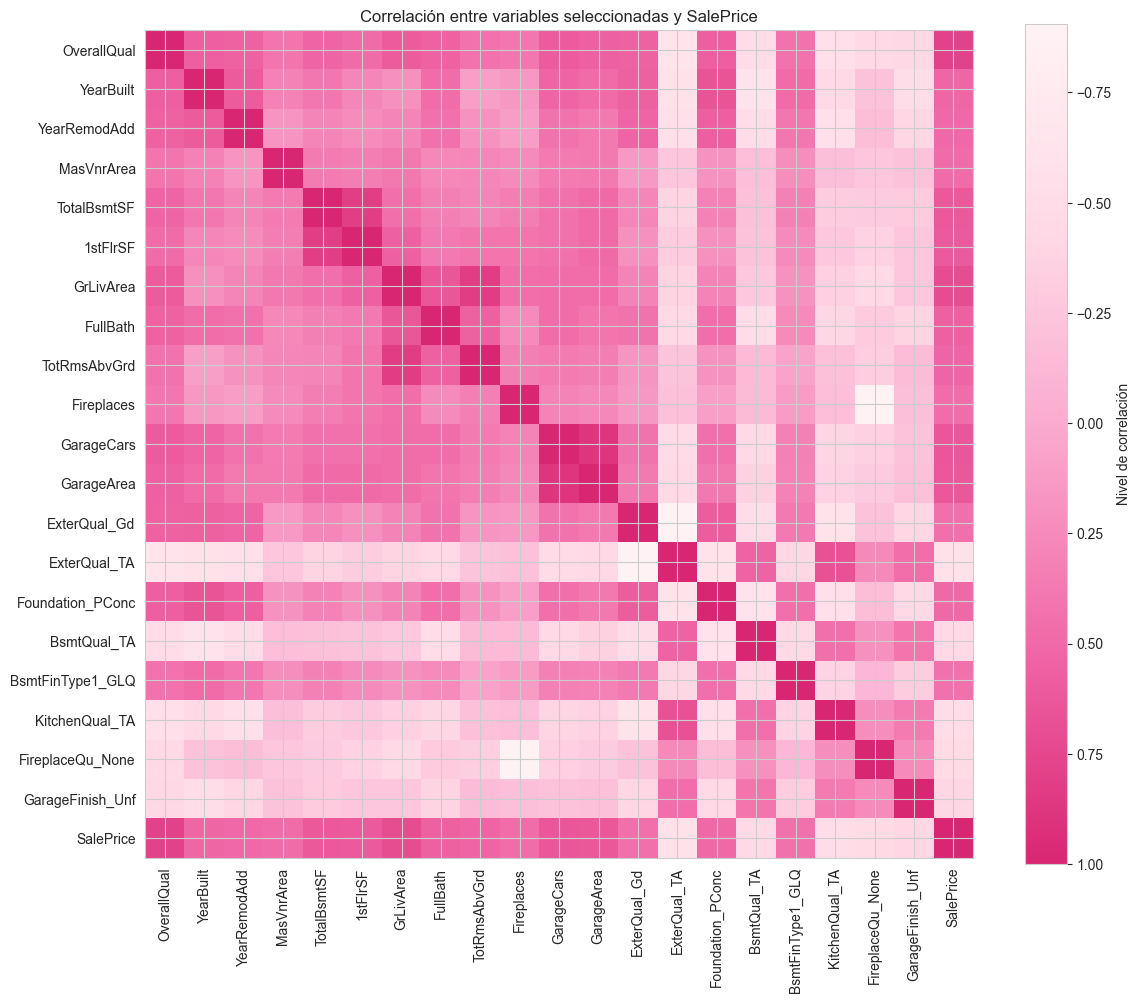

<Figure size 800x500 with 0 Axes>

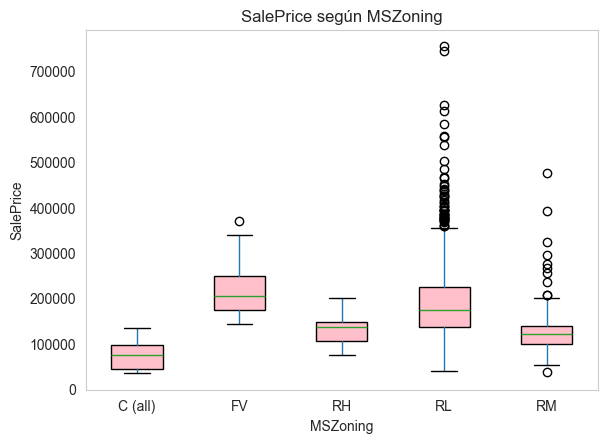

<Figure size 800x500 with 0 Axes>

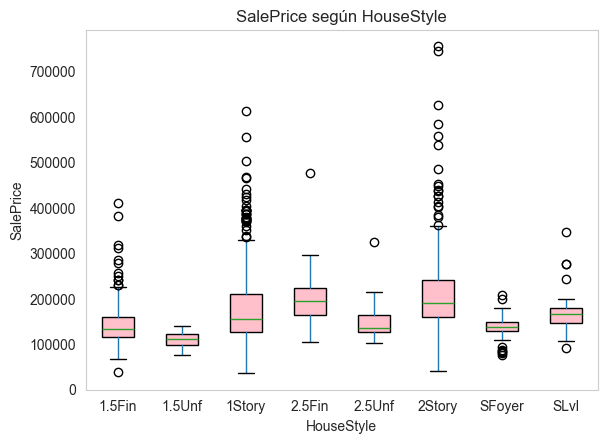

<Figure size 800x500 with 0 Axes>

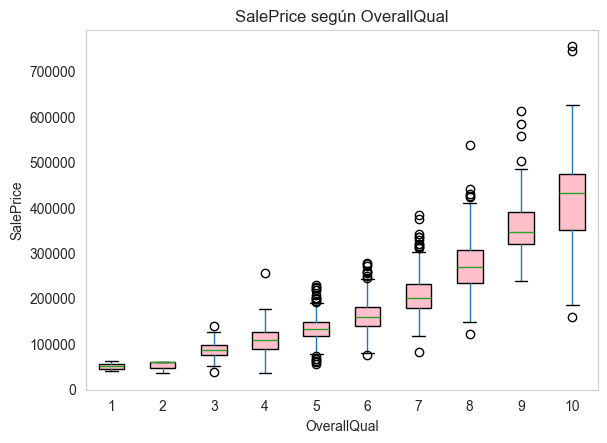

In [307]:
#Mapa de color de Correlacción

df_corr = X[selected_features].copy()
df_corr["SalePrice"] = train_y.values
correlaciones = df_corr.corr()

colors = [
    (1.0, 0.95, 0.96),
    (1.0, 0.85, 0.9),
    (0.98, 0.65, 0.8),
    (0.94, 0.4, 0.65),
    (0.85, 0.15, 0.45)
]
rosa_map = LinearSegmentedColormap.from_list("rosa_gradiente", colors, N=256)

plt.figure(figsize=(12, 10))
im = plt.imshow(correlaciones, cmap=rosa_map, interpolation="none", origin="upper",
                vmin=correlaciones.values.min(), vmax=correlaciones.values.max())
cbar = plt.colorbar(im, label="Nivel de correlación", orientation="vertical")
cbar.ax.invert_yaxis()
plt.xticks(range(len(correlaciones.columns)), correlaciones.columns, rotation=90)
plt.yticks(range(len(correlaciones.columns)), correlaciones.columns)
plt.title("Correlación entre variables seleccionadas y SalePrice")
plt.tight_layout()
plt.show()

#Diagramas de Cajas y Bigotes

train = pd.read_csv("train.csv")
target = "SalePrice"
vars_to_plot = ["MSZoning", "HouseStyle", "OverallQual"]

for var in vars_to_plot:
    plt.figure(figsize=(8,5))
    train.boxplot(column=target, by=var,
                  grid=False, patch_artist=True,
                  boxprops=dict(facecolor="pink", color="black"))
    plt.title(f"{target} según {var}")
    plt.suptitle("")
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()

In [308]:
# Modelo de regresión lineal múltiple

from sklearn.linear_model import LinearRegression

X_sel_df = X[selected_features].copy()
X_train, X_val, y_train, y_val = train_test_split(X_sel_df, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred_log = model.predict(X_val)
y_val_pred = np.expm1(y_val_pred_log)  
y_val_true = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print("📊 Evaluación del modelo:")
print(f"→ R² en validación: {r2:.4f}")
print(f"→ RMSE en validación: {rmse:.2f}")

test_X_selected = test_proc[selected_features].copy()
y_test_pred_log = model.predict(test_X_selected)
y_test_pred = np.expm1(y_test_pred_log)  

📊 Evaluación del modelo:
→ R² en validación: 0.8682
→ RMSE en validación: 31791.51


In [309]:
output = pd.DataFrame({"Id": test["Id"], "SalePrice": y_test_pred})
output.to_csv("predicciones.csv", index=False)

print("Archivo 'predicciones.csv' generado con éxito ✅")

Archivo 'predicciones.csv' generado con éxito ✅


**Puntaje:**


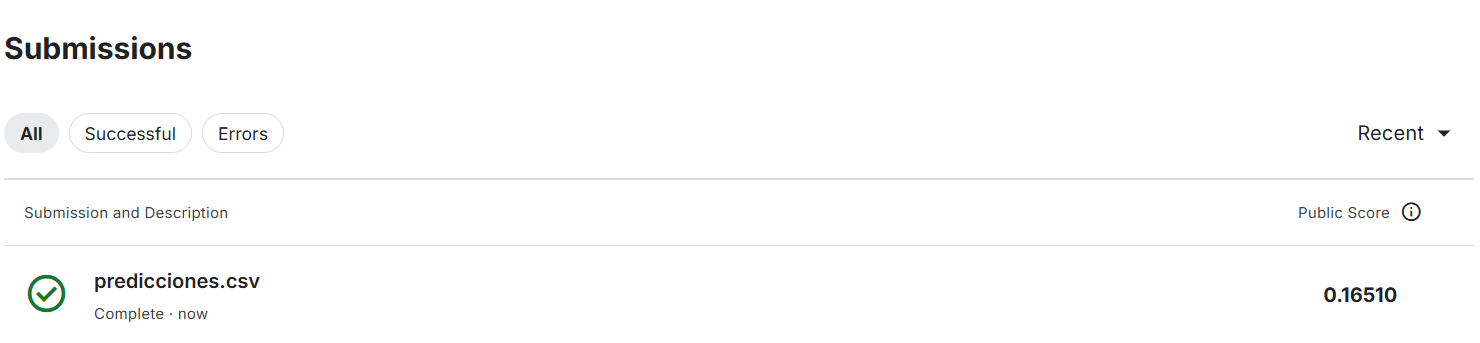

**Puesto**

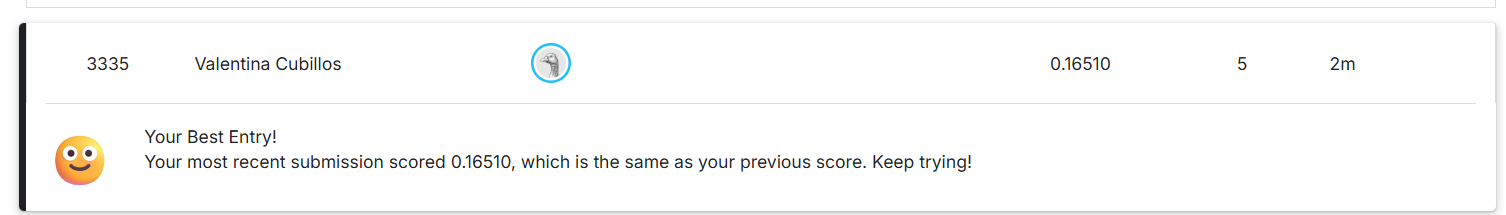